In [1]:
import csv

In [2]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("titanic.csv")

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.shape

(891, 12)

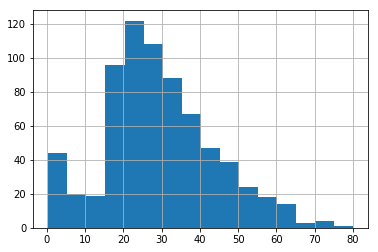

In [11]:
# Count based on all passengers; sex does not matter. Looking at how many were children, youth, middle aged, and old
df['Age'].hist(bins=16)
plt.show()

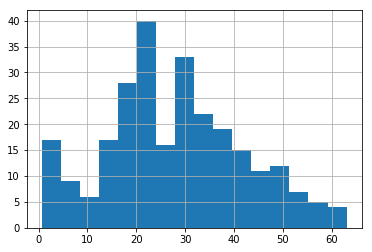

In [12]:
# How many females within that range of age?
df[(df["Sex"] == "female")].Age.hist(bins = 16)

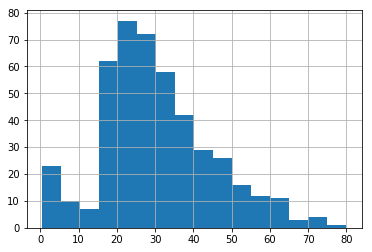

In [13]:
# And how many males?
df[(df["Sex"] == "male")].Age.hist(bins = 16)

In [14]:
# How many null/not numbered values are there?
df['Age'].isna().sum()

177

In [15]:
df['Age'].isnull().sum()

177

In [16]:
# Add another column. Name it "gender". Female = 0, male = 1.
df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1}).astype(int)

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [18]:
# Another way of doing the gender thing
def numeric_gender(sex):
    if sex == 'female':
        return 0
    if sex == 'male':
        return 1

df["Gender"] = df["Sex"].apply(numeric_gender)
df[["Sex", "Gender"]]

,Sex,Gender
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1
5,male,1
6,male,1
7,male,1
8,female,0
9,female,0


In [20]:
# Another way of doing the gender thing
df['Gender'] = df['Sex'].apply(lambda sex: "1" if sex == "male" else "0")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


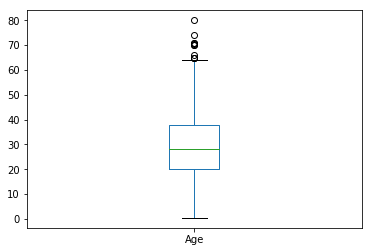

In [21]:
# Show the majority of age range. Dots = outliers.
# This is a box-and-whisker plot
df['Age'].plot.box()

In [24]:
# We want a list with all the null ages removed. Get the length of the list.
df[df['Age'].notnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0


In [25]:
# also
df['Age'].dropna().values

array([22.  , 38.  , 26.  , 35.  , 35.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  , 31.  , 35.  ,
       34.  , 15.  , 28.  ,  8.  , 38.  , 19.  , 40.  , 66.  , 28.  ,
       42.  , 21.  , 18.  , 14.  , 40.  , 27.  ,  3.  , 19.  , 18.  ,
        7.  , 21.  , 49.  , 29.  , 65.  , 21.  , 28.5 ,  5.  , 11.  ,
       22.  , 38.  , 45.  ,  4.  , 29.  , 19.  , 17.  , 26.  , 32.  ,
       16.  , 21.  , 26.  , 32.  , 25.  ,  0.83, 30.  , 22.  , 29.  ,
       28.  , 17.  , 33.  , 16.  , 23.  , 24.  , 29.  , 20.  , 46.  ,
       26.  , 59.  , 71.  , 23.  , 34.  , 34.  , 28.  , 21.  , 33.  ,
       37.  , 28.  , 21.  , 38.  , 47.  , 14.5 , 22.  , 20.  , 17.  ,
       21.  , 70.5 , 29.  , 24.  ,  2.  , 21.  , 32.5 , 32.5 , 54.  ,
       12.  , 24.  , 45.  , 33.  , 20.  , 47.  , 29.  , 25.  , 23.  ,
       19.  , 37.  , 16.  , 24.  , 22.  , 24.  , 19.  , 18.  , 19.  ,
       27.  ,  9.  , 36.5 , 42.  , 51.  , 22.  , 55.5 , 40.5 , 51.  ,
       16.  , 30.  ,

In [27]:
# Slice the dataframe for those whose Embarked section was "C"
df[df['Embarked'] == 'C'].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,1
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,1


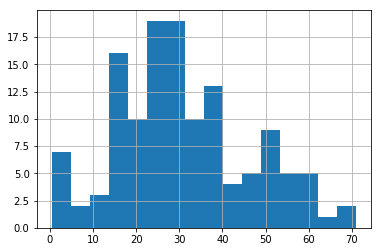

In [30]:
# Plot the age range for those whose Embarked section was "C"
df[df['Embarked'] == 'C']['Age'].hist(bins=16)

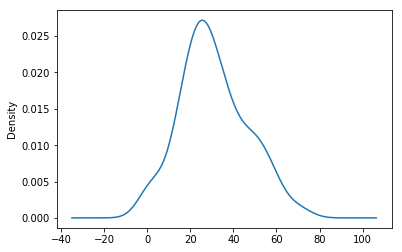

In [33]:
# Apply a couple of Normal Distributions to Histogram obtained above
df[df['Embarked'] == 'C']['Age'].plot(kind='kde')
# KDE = kernel density estimate. 

In [34]:
# Describe a specific column
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [35]:
# count = number of entries
# unique = number of unique types (3 ports people embarked at)
# top = more ppl embarked at S than any other port
# freq = # ppl who embarked at S

In [37]:
# How many unique values does Embarked have?
df['Embarked'].nunique()

3

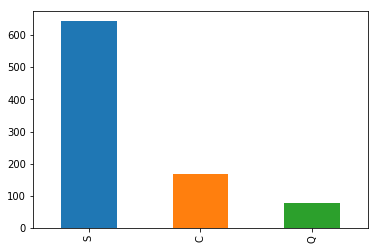

In [44]:
# Count and plot the different 'Embarked' values the dataframe has
df['Embarked'].value_counts().plot(kind='bar')

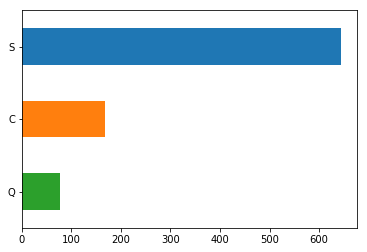

In [45]:
# Count the different 'Embarked' values the dataframe has
# And plot horizontally
df['Embarked'].value_counts().plot('barh').invert_yaxis()

# Check df['Embarked'].value_counts().plot('barh')

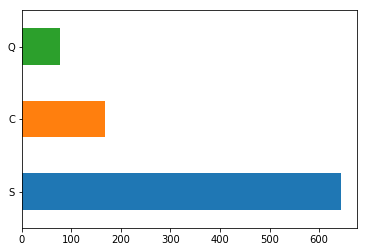

In [46]:
df['Embarked'].value_counts().plot('barh')

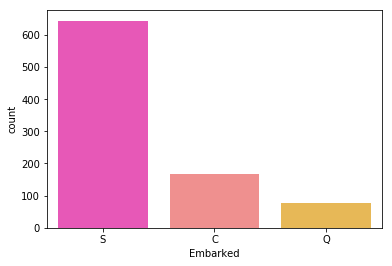

In [47]:
# Another way to do the count and plot it
import seaborn as sns

# Bar Chart Example #1 (Simple): Categorical Variables Showing Counts
sns.countplot(x="Embarked", palette="spring", data=df)

In [48]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

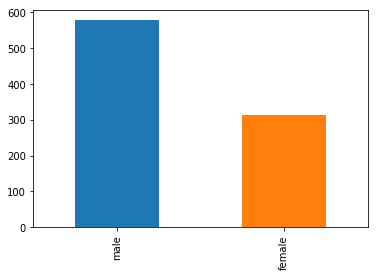

In [49]:
df['Sex'].value_counts().plot(kind='bar')

Sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

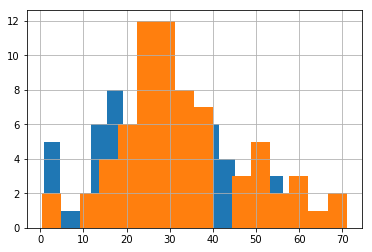

In [51]:
# Plot how many of the passengers were children, youth middle age,
# and old based on their sex for those who Embarked in Section C?
df[df['Embarked'] == 'C'].groupby('Sex')['Age'].hist(bins=16)

In [52]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

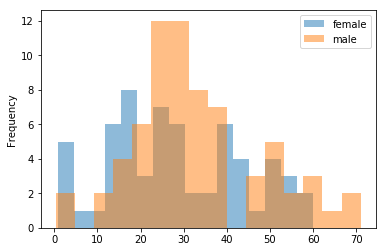

In [53]:
df[df['Embarked'] == 'C'].groupby('Sex')['Age'].plot(bins=16, kind='hist', legend=True, alpha=0.5)

In [62]:
# What is the average age for female and male (based on sex)
# for those who have 'Embarked' on section 'C'?
df[df['Embarked'] == 'C'].groupby('Sex')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,61.0,28.344262,15.77083,0.75,17.0,24.0,40.0,60.0
male,69.0,32.998841,14.90544,0.42,24.0,30.0,40.0,71.0


In [63]:
import numpy as np
df[df['Embarked'] == 'C'].groupby('Sex')['Age'].agg(np.mean)

Sex
female    28.344262
male      32.998841
Name: Age, dtype: float64

Sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

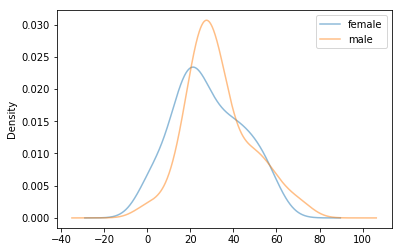

In [57]:
df[df['Embarked'] == 'C'].groupby('Sex')['Age'].plot(kind='kde', legend=True, alpha=0.5)